<a href="https://colab.research.google.com/github/dmitrijg08/NM/blob/main/%D0%93%D1%83%D1%81%D0%B0%D0%BA_%D0%94_%D0%9B%D0%A011_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Метод найменших квадратів (МНК)

1. Приклад 1.Наближення прямою.
Реалізація метода вручну

x = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [1.6151463  2.31977682 2.71148102 2.48257773 1.81933699 1.15156284
 0.70413637 0.46916419 0.37623922 0.383305  ]
Рівняння лінії найкращої підгонки: y = -2.5398x + 2.8001


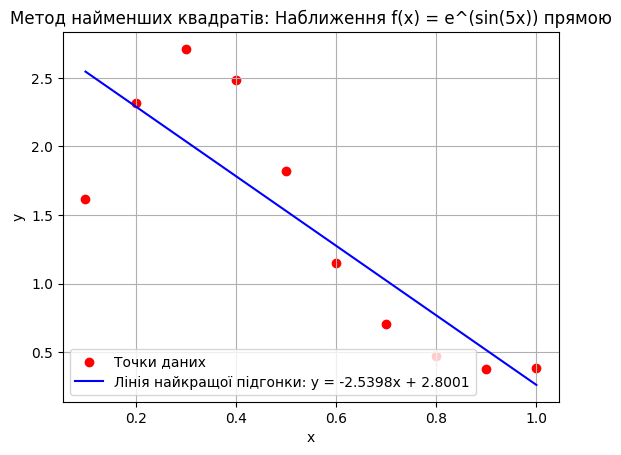

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.exp(np.sin(5 * x))

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x =', x)
print('y =', y)

n = len(x)

numerator_a = n * np.sum(x * y) - np.sum(x) * np.sum(y)
denominator_a = n * np.sum(x**2) - np.sum(x)**2
a = numerator_a / denominator_a

x_mean = np.mean(x)
y_mean = np.mean(y)
b = y_mean - a * x_mean

print(f"Рівняння лінії найкращої підгонки: y = {a:.4f}x + {b:.4f}")

y_fit = a * x + b

plt.scatter(x, y, color='red', label='Точки даних')
plt.plot(x, y_fit, color='blue', linestyle='-', label=f'Лінія найкращої підгонки: y = {a:.4f}x + {b:.4f}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Метод найменших квадратів: Наближення f(x) = e^(sin(5x)) прямою')
plt.legend()
plt.grid(True)
plt.show()

Приклад 2. Реалізація МНК наближення прямою за допомогою polyfit()

x = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [1.6151463  2.31977682 2.71148102 2.48257773 1.81933699 1.15156284
 0.70413637 0.46916419 0.37623922 0.383305  ]
Рівняння лінії: y = -2.5398x + 2.8001


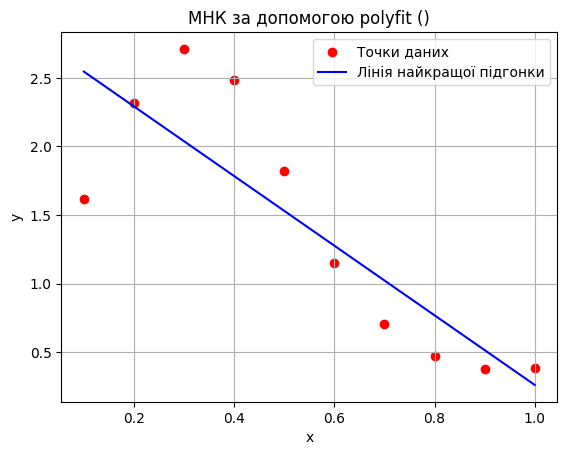

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.exp(np.sin(5 * x))

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x =', x)
print('y =', y)

coefficients = np.polyfit(x, y, 1)

a, b = coefficients
print(f"Рівняння лінії: y = {a:.4f}x + {b:.4f}")

polynomial = np.poly1d(coefficients)

plt.scatter(x, y, color='red', label='Точки даних')
x_line = np.linspace(min(x), max(x), 100)
plt.plot(x_line, polynomial(x_line), color='blue', label='Лінія найкращої підгонки')

plt.title('МНК за допомогою polyfit ()')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Приклад 3  Реалізація МНК наближення параболою за допомогою polyfit()

x = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [1.6151463  2.31977682 2.71148102 2.48257773 1.81933699 1.15156284
 0.70413637 0.46916419 0.37623922 0.383305  ]
Рівняння параболи: y = -2.7430x^2 + 0.4776x + 2.1967


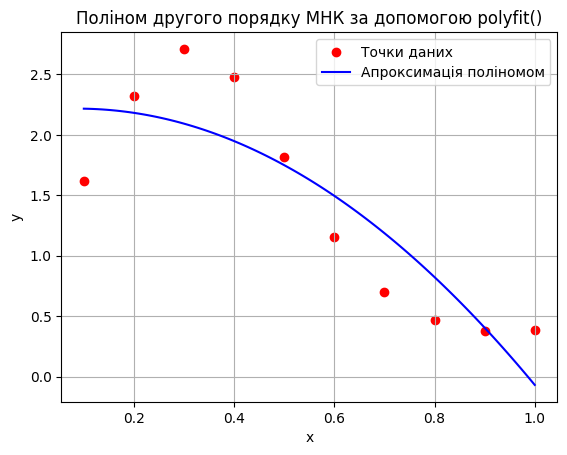

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.exp(np.sin(5 * x))

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x =', x)
print('y =', y)

coefficients = np.polyfit(x, y, 2)

a, b, c = coefficients
print(f"Рівняння параболи: y = {a:.4f}x^2 + {b:.4f}x + {c:.4f}")

polynomial = np.poly1d(coefficients)

plt.scatter(x, y, color='red', label='Точки даних')
x_line = np.linspace(min(x), max(x), 100)
plt.plot(x_line, polynomial(x_line), color='blue', label='Апроксимація поліномом')

plt.title('Поліном другого порядку МНК за допомогою polyfit()')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Приклад 4. Наближення параболою за допомогою least_squares ()

x = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [1.6151463  2.31977682 2.71148102 2.48257773 1.81933699 1.15156284
 0.70413637 0.46916419 0.37623922 0.383305  ]
a0 = 2.1967, a1 = 0.4776, a2 = -2.7430


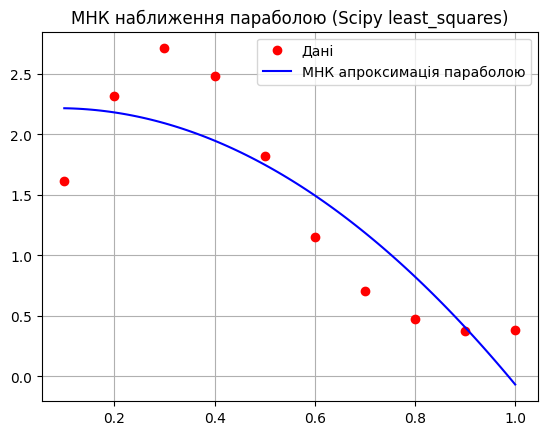

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def func(x):
    return np.exp(np.sin(5 * x))

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x =', x)
print('y =', y)

def fun(a, x, y):
    return a[0] + a[1] * x + a[2] * x**2 - y

a0 = np.array([1, 1, 1])

res_lsq = least_squares(fun, x0=a0, args=(x, y))

a0_opt, a1_opt, a2_opt = res_lsq.x
print("a0 = %.4f, a1 = %.4f, a2 = %.4f" % (a0_opt, a1_opt, a2_opt))

def f(x):
    return res_lsq.x[0] + res_lsq.x[1] * x + res_lsq.x[2] * x**2

x_p = np.linspace(min(x), max(x), 100)
y_p = f(x_p)

plt.plot(x, y, 'o', color='red', label='Дані')
plt.plot(x_p, y_p, 'b', label='МНК апроксимація параболою')
plt.title("МНК наближення параболою (Scipy least_squares)")
plt.legend()
plt.grid(True)
plt.show()